# Premier League (Soccer)


## Here is an Analysis and Goal Prediction of the 2019/2020 Premier League season.
### Data: https://www.kaggle.com/idoyo92/epl-stats-20192020
### Note: The data set contains data from the 2019/2020 Premier League Season up to Matchweek 29. The remaining data is missing due to interruptions to the season caused by COVID-19.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE

# Data Exploration

In [84]:
file = 'epl2020.csv'
df = pd.read_csv(file, index_col=0)

In [85]:
df.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [179]:
pl = df # copy

## Boxplot of goals scored by each team

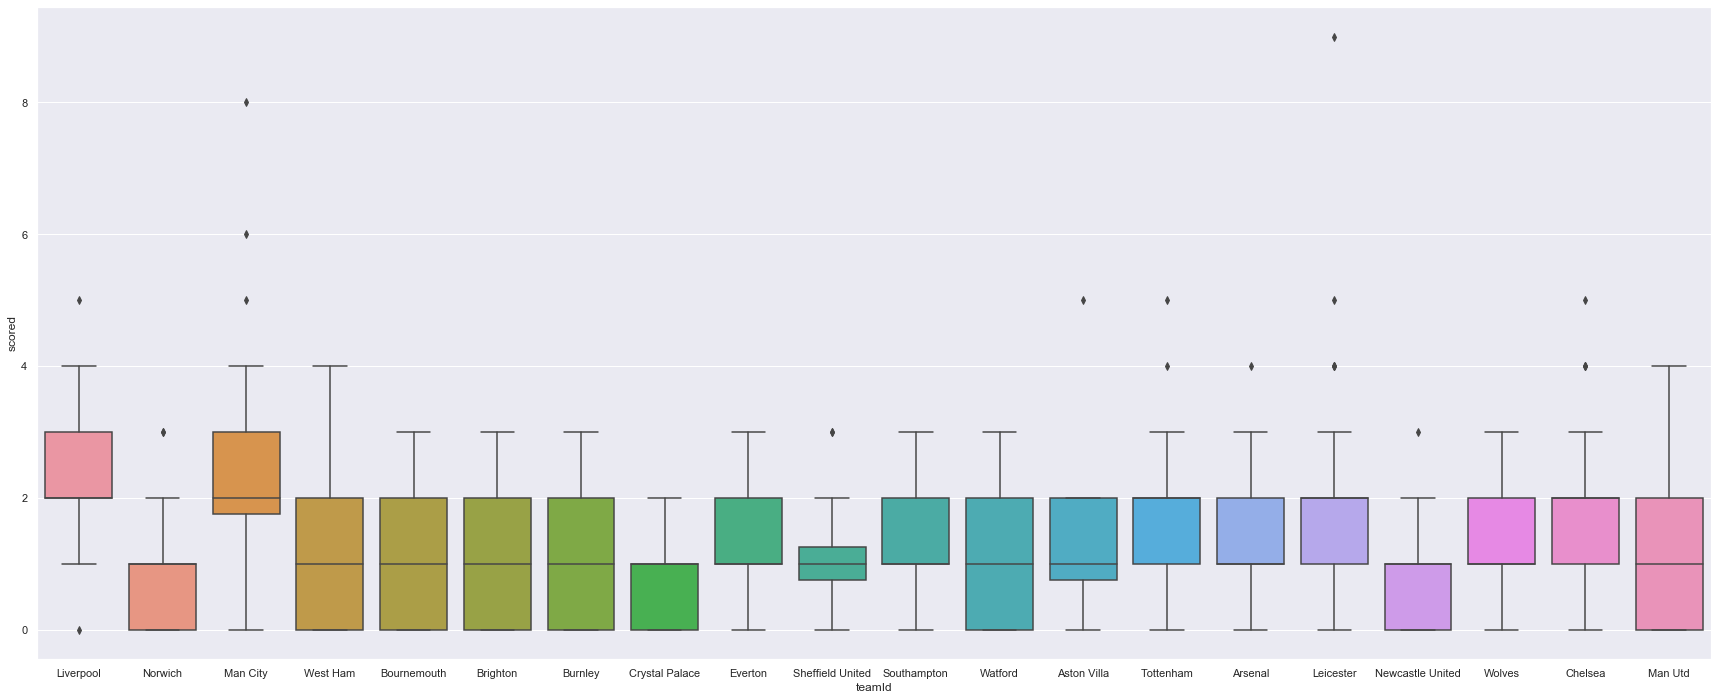

In [87]:
sns.set(rc={'figure.figsize':(30,12)})
sns.boxplot(x="teamId", y="scored", data=df)

As expected, teams usually score on average 1 goal per match. Liverpool, the highest scoring team ended up Evidently there are some outliers to this data such as Leicester City's 9-goal haul against Southampton.

## Goals scored by each team separated by match result

In [88]:
df_test = df[['teamId', 'result', 'scored']]
df_grp = df_test.groupby(['teamId', 'result'], as_index=False).mean()
d = {'l':'lost','d':'draw','w':'won'}
df_grp = df_grp.replace(d)
df_grp.head()

,teamId,result,scored
0,Arsenal,draw,1.307692
1,Arsenal,lost,0.500000
2,Arsenal,won,2.222222
3,Aston Villa,draw,1.250000
4,Aston Villa,lost,0.764706


In [89]:
df_pivot = df_grp.pivot(index='teamId', columns='result')
c = df_pivot.columns
df_pivot = df_pivot[c[np.r_[1, 0, 2:len(c)]]]
df_pivot

scored                    
result                lost      draw       won
teamId                                        
Arsenal           0.500000  1.307692  2.222222
Aston Villa       0.764706  1.250000  2.285714
Bournemouth       0.500000  1.000000  2.142857
Brighton          0.416667  1.090909  2.500000
Burnley           0.500000  0.833333  2.090909
Chelsea           0.333333  1.666667  2.714286
Crystal Palace    0.200000  1.000000  1.500000
Everton           0.833333  0.857143  2.100000
Leicester         0.500000  0.800000  3.125000
Liverpool         0.000000  1.000000  2.407407
Man City          0.857143  2.000000  3.111111
Man Utd           0.125000  1.222222  2.666667
Newcastle United  0.333333  0.875000  1.555556
Norwich           0.500000  1.000000  2.000000
Sheffield United  0.142857  1.200000  1.545455
Southampton       0.733333  1.250000  1.900000
Tottenham         0.600000  1.250000  2.818182
Watford           0.428571  0.666667  2.500000
West Ham          0.687500  1.333333  2.285714
Wolves            1.166667  0.769231  2.400000

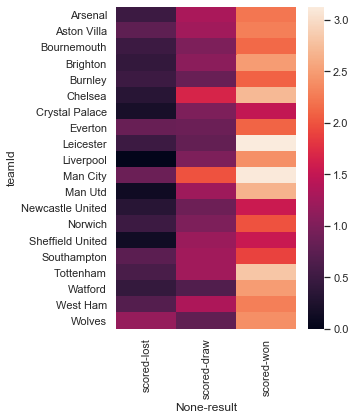

In [90]:
plt.rcParams["figure.figsize"] = (5, 6)
ax = sns.heatmap(df_pivot)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

This heatmap highlights some interesting information. As expected, teams scored more goals in games that they won and vice versa. However, an exception is Wolves: surprisingly they scored more goals in the games they lost compared to the games they drew in. They also scored the highest goals in losing matches. 
This also leads us to think that they lost most of their games to higher scoring sides. For a recently promoted team like Wolves, this is great! They show a real fighting spirit in games against the big clubs.

## Correlation Matrix

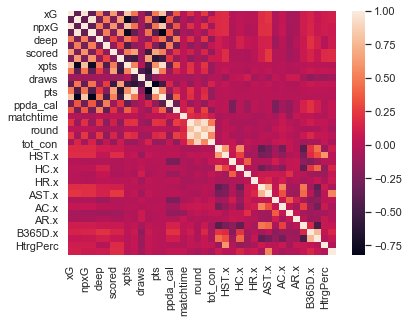

In [103]:
sns.heatmap(df.corr())
plt.rcParams["figure.figsize"] = (6,4.5)
plt.show()

## Home matches vs Away matches

In [104]:
df_test2 = df[['teamId', 'h_a', 'scored']]
df_grp2 = df_test2.groupby(['teamId', 'h_a'], as_index=False).mean()
df_grp2.head()

,teamId,h_a,scored
0,Arsenal,a,1.076923
1,Arsenal,h,1.733333
2,Aston Villa,a,1.066667
3,Aston Villa,h,1.384615
4,Bournemouth,a,0.800000


In [105]:
df_pivot2 = df_grp2.pivot(index='teamId', columns='h_a')
c = df_pivot2.columns
df_pivot2 = df_pivot2[c[np.r_[1, 0, 2:len(c)]]]
df_pivot2

scored          
h_a                      h         a
teamId                              
Arsenal           1.733333  1.076923
Aston Villa       1.384615  1.066667
Bournemouth       1.214286  0.800000
Brighton          1.214286  1.000000
Burnley           1.333333  1.000000
Chelsea           1.466667  2.071429
Crystal Palace    0.800000  1.000000
Everton           1.357143  1.200000
Leicester         2.000000  2.000000
Liverpool         2.666667  1.857143
Man City          2.538462  2.333333
Man Utd           1.933333  1.071429
Newcastle United  0.857143  0.866667
Norwich           1.357143  0.400000
Sheffield United  1.133333  1.000000
Southampton       1.066667  1.357143
Tottenham         1.928571  1.333333
Watford           1.142857  0.733333
West Ham          1.642857  0.800000
Wolves            1.400000  1.428571

In [106]:
teams = []
doublet = list(df_grp2['teamId'])
for i in range(len(doublet)):
    if (i%2 == 0):
        teams.append(doublet[i])

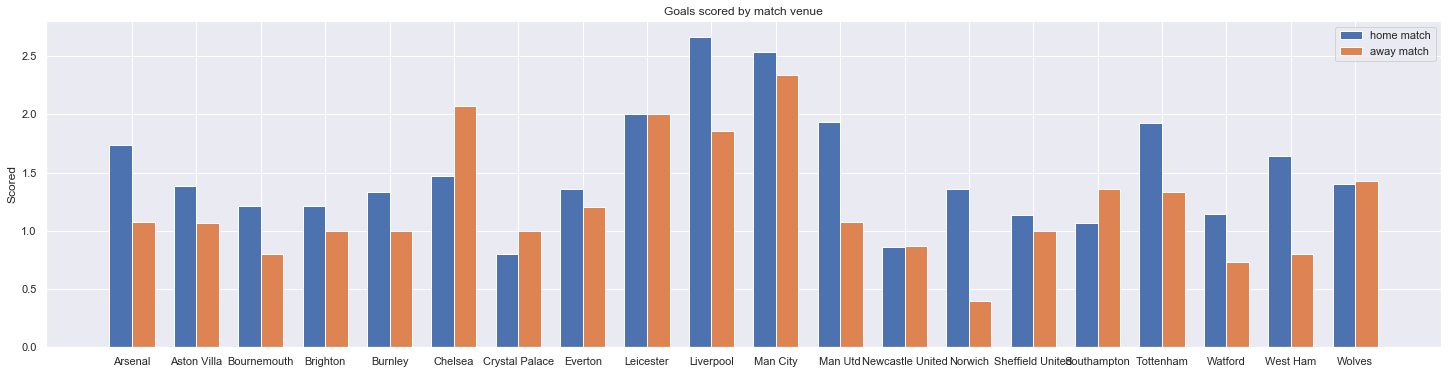

In [107]:
plt.rcParams["figure.figsize"] = (25,6)
labels = teams
men_means = list(df_pivot2['scored', 'h'])
women_means = list(df_pivot2['scored', 'a'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='home match')
rects2 = ax.bar(x + width/2, women_means, width, label='away match')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scored')
ax.set_title('Goals scored by match venue')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

plt.show()

Soccer fans have always expected teams to perform better in home games compared to away games. But this visualization is really surprising. The impact that playing in a home stadium has for teams is generally massive as displayed above.
Something important here is that Chelsea score much more goals in away games compared to home games. This supports the big results they managed to attain in away games.

## Day of the week

In [108]:
df_test23 = df[['matchDay', 'scored']]
df_grp23 = df_test23.groupby(['matchDay'], as_index=False).mean()
df_grp23

,matchDay,scored
0,Fri,1.611111
1,Mon,1.200000
2,Sat,1.292683
3,Sun,1.507812
4,Thu,1.269231
5,Tue,1.500000
6,Wed,1.425000


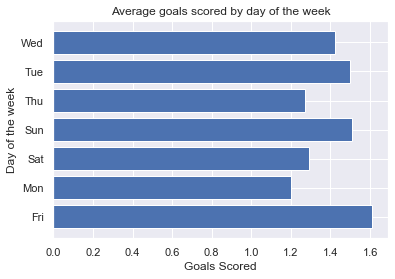

In [109]:
plt.rcParams["figure.figsize"] = (6,4)
height = df_grp23['scored']
bars = df_grp23['matchDay']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.xlabel("Goals Scored")
plt.ylabel("Day of the week")
plt.title("Average goals scored by day of the week")
plt.yticks(y_pos, bars)

plt.show()

Teams usually score higher goals on games played on Fridays. This could be because of the higher fan support and stadium turnout on this day since it is the beginning of the weekend.

## Referee

#### Let's examine the goals scored in matches officiated by each referee. Let's first check how many matches each referee officiated.

In [185]:
df_test3 = pl[['Referee.x', 'scored']]
refereed = pd.DataFrame(df_test3['Referee.x'].value_counts())
refereed

,Referee.x
M Atkinson,50
A Taylor,46
M Oliver,46
M Dean,44
C Kavanagh,40
J Moss,40
K Friend,40
P Tierney,40
A Marriner,34
S Attwell,30


In [186]:
df_grp3 = df_test3.groupby(['Referee.x'], as_index=False).mean()
df_grp3

,Referee.x,scored
0,A Madley,1.333333
1,A Marriner,1.382353
2,A Taylor,1.304348
3,C Kavanagh,1.225000
4,C Pawson,1.500000
5,D Coote,1.272727
6,D England,2.500000
7,G Scott,1.357143
8,J Moss,1.525000
9,K Friend,1.450000


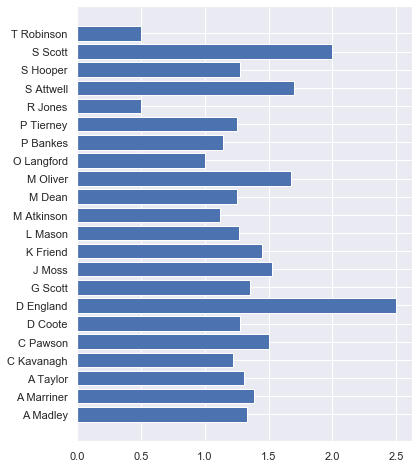

In [112]:
plt.rcParams["figure.figsize"] = (6,8)
height = df_grp3['scored']
bars = df_grp3['Referee.x']
y_pos = np.arange(len(bars))

plt.barh(y_pos, height)

plt.yticks(y_pos, bars)

plt.show()

This should not really make a difference in the ideal world to promote fairness. There are outlier results such as D England. But from the first table we can see that some referees officiated very few games not giving us a reasonable amount of data. 
If we eliminate these referees, we can see the range of the results is about 0.6 (1.1-1.7 goals per match). This is disastrous as it shows the impact referees can have on a game. They are the ones who make key decisions such as awarding penalties and red cards which can easily affect the result of a game. 

## Preprocessing

#### Let us now prepare the data to build the actual models to predict goals scored.

To begin with, we do not need the result column as the result column only contains (W/L/D) whicha are already represented as one-hot-encoded features. Therefore we can safely remove it.

In addition, we also won't be requiring the npxGD column (expected goal difference) which is just the difference of npxG and npxGA columns that are aldready present in the DataFrame; hence, we remove it to avoid redundancy.

In [187]:
pl = pl.drop(['result', 'npxGD'], axis=1)

In [188]:
pl.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


There is also a date column which is in the form - 2019-08-09 20:00
Let's split this coulmn in order to better represent it.
- Let's extract the year the match took place in i.e 2019 or 2020
- We will also extract the month the match took place in.
- We will ignore the rest of the representation which is the date and time and drop that column.

The date is not expected to play a major role; instead the day of the week the match took place may and it is already included in the DataFrame as a seperate column. The time is also ignore as it too is also represented as another column in the DataFrame.

In [115]:
pl[['year', 'month', 'date_drop']] = pl.date.str.split("-",expand=True,)

In [116]:
pl = pl.drop(['date', 'date_drop'], axis=1)

In [117]:
pl.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay,year,month
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri,2019,08
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri,2019,08
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat,2019,08
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat,2019,08
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat,2019,08


## One-Hot-Encoding

##### We have several columns in the DataFrame that need to be one-hot-encoded.
Here are the features that are categorical and need to be one-hot encoded:

1) h_a - represents wheather the game was played at home or away.

2) teamId -  represents the team name. 

3) matchtime - the hour at which the match took place.

4) Referee.x - the referee for that particular game.

5) matchDay - the day of the week the match took place

6) month - the month the game took place

7) year - the year the game took place i.e 2019 or 2020

In [118]:
# one-hot-encoding
pl = pd.get_dummies(pl, columns=['h_a', 'teamId', 'matchtime', 'Referee.x', 'matchDay', 'month', 'year'])

In [119]:
pl.head()

,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,wins,...,month_01,month_02,month_03,month_08,month_09,month_10,month_11,month_12,year_2019,year_2020
1,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,1,...,0,0,0,1,0,0,0,0,1,0
2,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,0,...,0,0,0,1,0,0,0,0,1,0
3,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,1,...,0,0,0,1,0,0,0,0,1,0
4,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,0,...,0,0,0,1,0,0,0,0,1,0
5,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,0,...,0,0,0,1,0,0,0,0,1,0


We can see the number of columns increased from  43 to 107 due to one-hot-encoding.

### Splitting data into training and testing sets

#### We will now convert our DataFrame to NumPy arrays so we can run the learning algorithims.

In [120]:
l = pl.columns
pl = pl[l[np.r_[6, 0, 1, 2, 3, 4, 5, 7:len(l)]]]

In [121]:
# converting to numpy arrays
X = pl.loc[:, 'xG':].values
y = pl.loc[:, 'scored'].values

In [122]:
print("The shape of the dataset:",X.shape)

The shape of the dataset: (576, 106)


#### We will now split our data into the training set (75%) and the test set (25%).

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [124]:
print("The shape of the training dataset:", X_train.shape)
print("The shape of the test dataset:", X_test.shape)

The shape of the training dataset: (432, 106)
The shape of the test dataset: (144, 106)


So there are 432 training data points and 144 test data points. Also, we have a total of 106 features.

## Discussion

##### Before we begin with our models, let us take a step back and discuss the features.

Here are some of the features to look out for as they may largely affect the number of goals scored:

- Team - The team that is playing will play a big role, as a highly ranked team will simply put, score more.
- xG - This is the expected goals for that match; its importance is almost trivial.
- xGA - This is the expected goals scored against. This can be helpful in predicting team motivation.
- Result - Goals scored correlate highly with the match result.
- PPDA - This is a measure of pressing play. It seems critical that PPDA and goals scored have a high correlation.

Since there are 106 features, we can only discuss a few. There might be some unexpected results!

### Keep in mind that the purpose of this notebook is to see whether other match statistics affect goals scored and if so, by how much.

## Learning Algorithims

### Linear Regresssion

###### Since this is a regression problem, we will first try the Linear Regression model.

In [125]:
from sklearn.linear_model import LinearRegression

# Initializing the model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
print("Linear regression R^2 value: {:.5f}".format(lr.score(X_test, y_test)))

Linear regression R^2 value: 0.58210


We start out with a R^2 value of 58%. This means 58% of the variance in the prediction is accounted for by the input features.
Although this is not bad for such a small dataset, let us see if we can do better.

### Ridge Regression

##### Let us try ridge regression, which is just linear regression with an addition of the penalty term for the coefficients using the L2 norm.

This regularization can help sometimes; let's find out:

###### Since Ridge regression has a hyperparameter, alpha, we will use GridSearchCV

In [167]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha':[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1000]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

grid_ridge.fit(X_train, y_train)

print("Best Hyperparameter alpha {}".format(grid_ridge.best_params_))

Best Hyperparameter alpha {'alpha': 100}


In [133]:
print("Ridge regression R^2 value: {:.5f}".format(grid_ridge.score(X_test, y_test)))

Ridge regression R^2 value: 0.61215


###### This is slightly better than linear regression with R^2 value inreasing by 3% percent. So, ridge regression did help, though not significantly.

#### Let us take a look at the coeffiecents found by the ridge regression model, this will show the importance of the features and also imply the correlation sign (positive/negative).

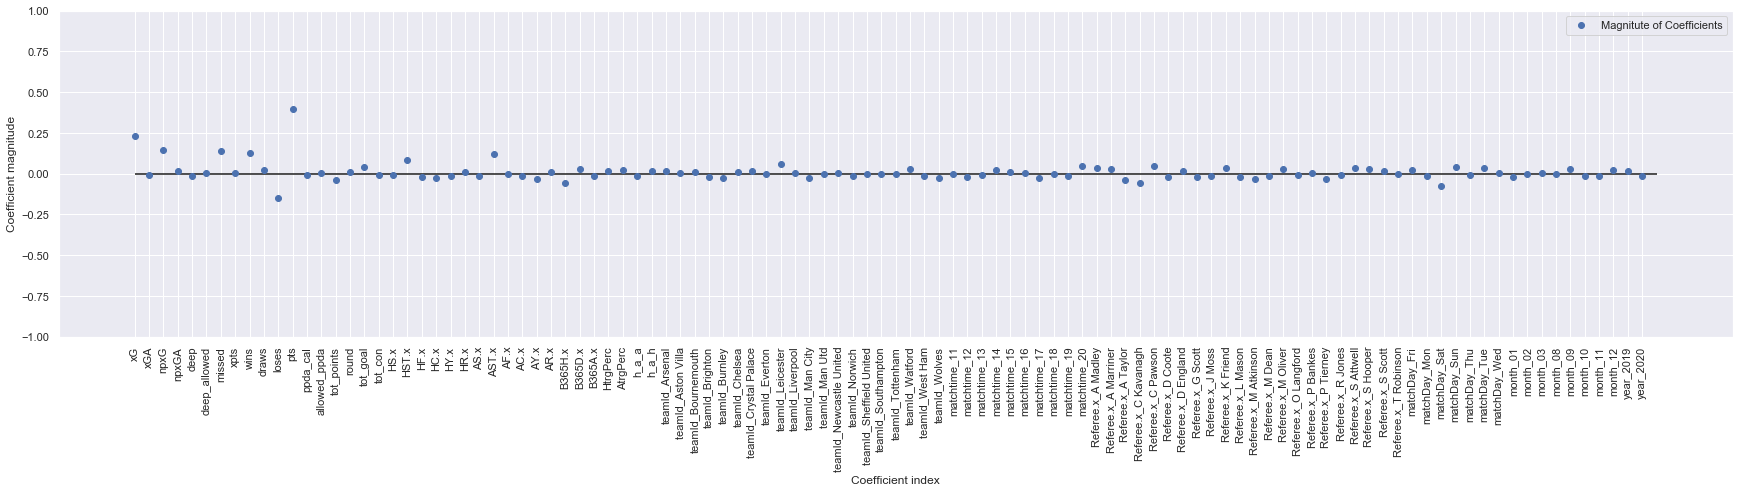

In [135]:
feature_names = pl.iloc[:,1:].columns
plt.plot(grid_ridge.best_estimator_.coef_.T, 'o', label="Magnitute of Coefficients")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-1, 1)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.rcParams["figure.figsize"] = (30,6)
plt.legend()

#### Discussion of Ridge regression

Due to the regularization i.e the penalty term, most of the coefficients are very close zero. This has one advantage as we can now clearly see which of the few features have a really high importance:

### Random Forests

##### Since we did not do any sort of feature engineering like rescaling or binning, decision trees may be the learning algorithim for us. This is as they are not affected by scaled features and thus are expected to perform better than the linear models we used previously.

In [153]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10)

# Fitting the data
forest.fit(X_train, y_train)
print("Random Forest regression score: ", forest.score(X_test, y_test))

Random Forest regression score:  0.7039300682552987


##### As expected, the random forest did a significantly better job with an R^2 value of over 70%. This is mainly due to the fact that decision trees can handle data that has a mixture of categorical and continuous features and data which is not scaled, very well. However, the same cannot be said about linear models.

#### Let us now take a look at the features the Radom Forest found important during its learning.

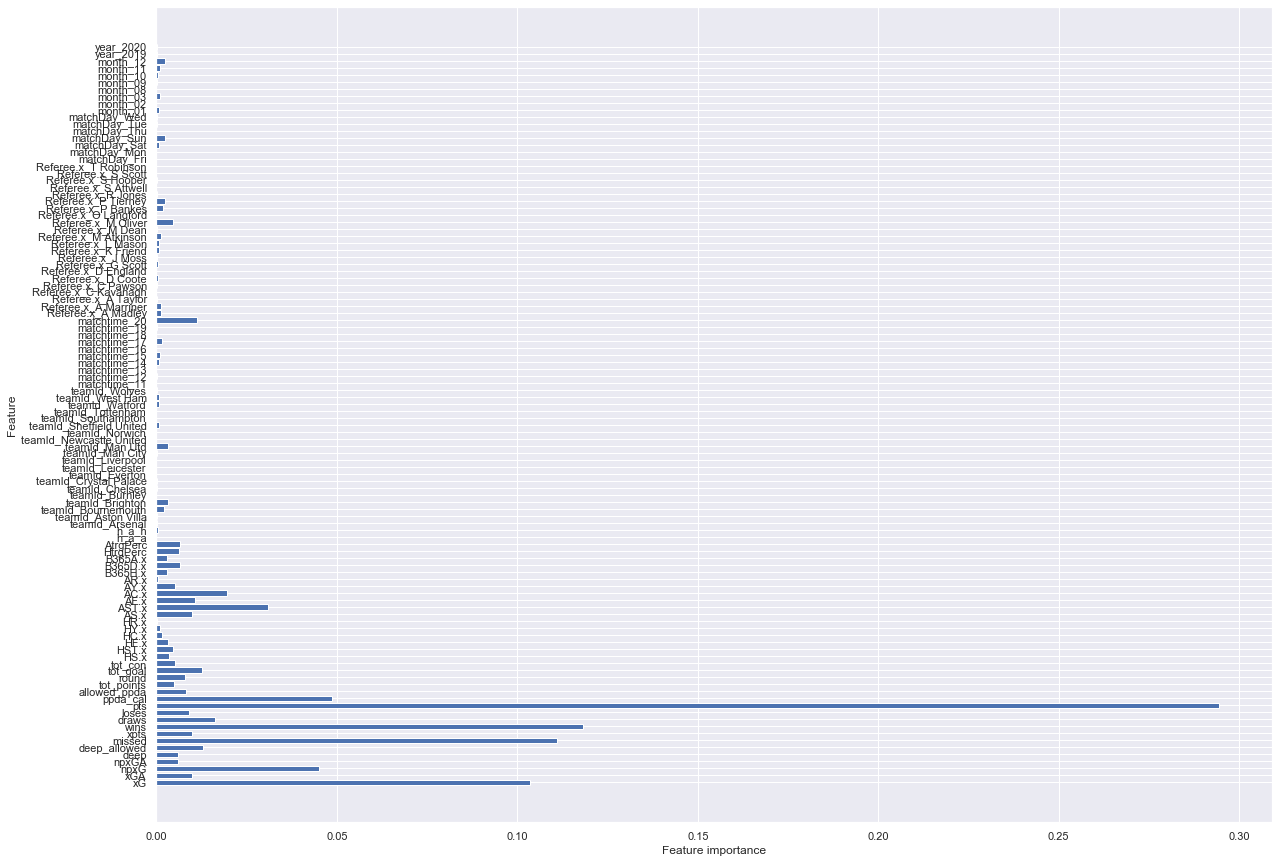

In [155]:
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.rcParams["figure.figsize"] = (20,15)

#### Disscusion of Random Forests
Let us discuss which features the decison trees found important while learning.

One point to note is that the features with high importance in random forests will not necessarily correlate to the ones on the linear models. This is as decision tress by their nature itself do not really look for features that correlate with the data, but rather they look for features that cause the data to be seperated well to their targets:

- ppda_cal - this is a measure of pressing play. It shows that higher pressing helps in scoring more goals. This is a sign of team dominance during the game.
- wins - its importance is trivial.
- xpts - its importance is trivial.
- xG - its importance is rather trivial. It is interesting to note that the decision tress did find that this was an important feature just like ridge regression did. This must be a really important feature! And it is easy to see why.

## Explaining the R^2 scores

###### Although the the linear models perfomed pretty well for such a small dataset, let us see why we did not get really high scores in the 80's.

###### Since there are 106 features, it would be very difficult to visualise a 106 dimensional space. Possibly, impossible!

#### To help us visualise this in a more modest 2 and 3-dimensional space, we will use Manifold Learning Algorithim, in particular we will use TSNE algorithim.

###### TSNE is an unsupervised learning algorithim that reduces the dimensionality and maintains the propotional distance between the data points. It is mainly used for data visualisation purposes.

Let us start with visualization in 3d:

In [156]:
from sklearn.manifold import TSNE
# Initializing
tsne = TSNE(random_state=42)

# Transforming the data
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(432, 2)

We can see that we have reduced the data to 2 features, this will help us visualize in 3d.

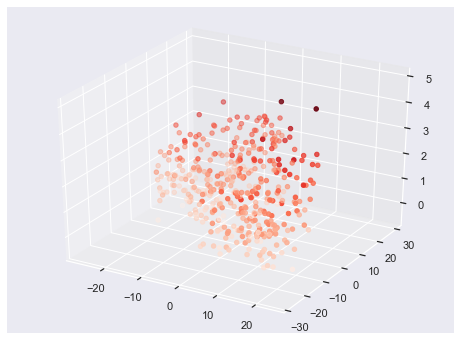

In [169]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = X_train_tsne[:, 0]
ydata = X_train_tsne[:, 1]
zdata = grid_ridge.predict(X_train)
plt.rcParams["figure.figsize"] = (8,6)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

###### Although it seems difficult to make out what's going on at first, there is no clear linear shape and it seem that the Nearly Straight condition for regression is not being met as we can only see a blob/cloud of data points.

#### To make things more clear, let us try 2d visualization:

###### Keep in mind that this is only an approximate of how the data will look like in 3D and 2D according to TSNE and it might not be really accurate. We should take this result with a grain of salt.

In [170]:
#Initializing
tsne2 = TSNE(n_components=1, random_state=42)

# Fitting and transforming the data
X_train_tsne2 = tsne2.fit_transform(X_train)

X_train_tsne2.shape

(432, 1)

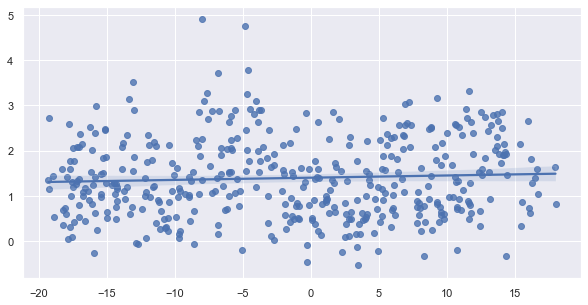

In [173]:
plt.rcParams["figure.figsize"] = (10,5)
sns.regplot(X_train_tsne2, grid_ridge.predict(X_train))

###### Here, we can see and explain more clearly the perfomance of the linear models.

1) We can see that the data is quite scattered from the best fit line and there is high variance. This might be one of the reason why the R^2 was not that high for the linear models.

2) Another reason is that linear models are not as good at handling a mixture of categorical and continuos features unlike decision trees.

3) The most important reason, however, is that we have a very small dataset with only 432 training samples, but 106 features. The small dataset does not allow us to build very complex models with high R^2 values.

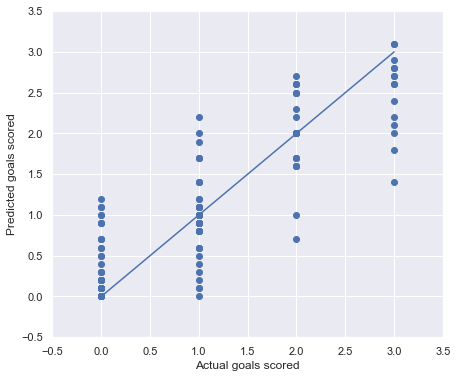

In [175]:
plt.plot([0, 3], [0, 3])
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.rcParams["figure.figsize"] = (7,6)
plt.xlabel("Actual goals scored")
plt.ylabel("Predicted goals scored")
plt.scatter(y_test, forest.predict(X_test))

## Conclusion

We built 3 models:

1) Linear regression - R^2 of 58%

2) Ridge regression - R^2 of 61%

3) Random Forest - R^2 of 70%

### Best R^2 value = 0.70393